# Malla con dos partículas
Resolución por Santiago Magaña Lerose  
2021

## Enunciado
En el sistema de la figura se tienen dos partículas de masa \\(m\\) unidas a las paredes con resortes dispuestos verticalmente de longitud natura \\(\ell_{0} < \frac{L}{2}\\) y constante elástica \\(k_1\\),y con otros dispuestos horizontontalmente de \\(\ell_0 = 0\\) (slinkies) y constante \\(k_2\\).
Imagine que las partículas tienen la libertad de moverse en el plano y que el sistema no está en un campo gravitatorio.  
![](figuras/malla.png)

## a)
¿Bajo qué aproximaciones es posible decir que el movimiento más general posible de cada una de las masas es una superposición lineal del movimiento más general posible de las oscilaciones longitudinales y de las oscilaciones transversales? Demuestre esta afirmación.  
![malla_ref.png](figuras/malla_ref.png)

In [1]:
import sympy as sp
from sympy.physics.mechanics import init_vprinting
init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [2]:
t= sp.Symbol('t')
D,L,k1,k2,m,l0= sp.symbols("D L K_1 K_2 M ell_0", positive=True)
la,lb,lc,ld,le,lf,lg= sp.symbols("L_A L_B L_C L_D L_E L_F L_G", positive=True)
alpha,beta,gamma,delta,epsilon,zeta,eta= sp.symbols("alpha,beta,gamma,delta,epsilon,zeta,eta", positive=True)
# x1,x2,y1,y2= sp.symbols("x_1 x_2 y_1 y_2")
x1= sp.Function('x_1')(t)
y1= sp.Function('y_1')(t)
x2= sp.Function('x_2')(t)
y2= sp.Function('y_2')(t)

In [3]:
newton= [sp.Eq(sp.diff(x1,t,2),(-k1*((ld-l0)*sp.sin(delta)+(le-l0)*sp.sin(epsilon))-k2*(la*sp.cos(alpha)-lb*sp.sin(beta)))/m),
        sp.Eq(sp.diff(x2,t,2),(-k1*((lf-l0)*sp.sin(zeta)+(lg-l0)*sp.sin(eta))-k2*(lb*sp.sin(beta)-lc*sp.cos(gamma)))/m),
        sp.Eq(sp.diff(y1,t,2),(-k1*((le-l0)*sp.cos(epsilon)-(ld-l0)*sp.cos(delta))-k2*(la*sp.sin(alpha)+lb*sp.cos(beta)))/m),
        sp.Eq(sp.diff(y2,t,2),(-k1*(-(lf-l0)*sp.cos(zeta)+(lg-l0)*sp.cos(eta))-k2*(lc*sp.sin(gamma)-lb*sp.cos(beta)))/m)
        ]
newton

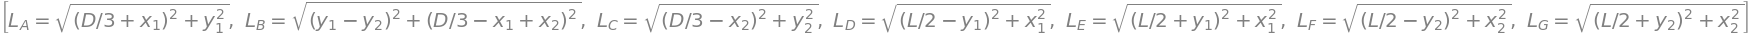

In [4]:
pitagoras= [sp.Eq(la,sp.sqrt((D/3+x1)**2+y1**2)),
           sp.Eq(lb,sp.sqrt(((D/3-x1)+x2)**2+(y1-y2)**2)),
           sp.Eq(lc,sp.sqrt((D/3-x2)**2+y2**2)),
           sp.Eq(ld,sp.sqrt((L/2-y1)**2+x1**2)),
           sp.Eq(le,sp.sqrt((L/2+y1)**2+x1**2)),
           sp.Eq(lf,sp.sqrt((L/2-y2)**2+x2**2)),
           sp.Eq(lg,sp.sqrt((L/2+y2)**2+x2**2)),
           ]
pitagoras

In [5]:
senos= [sp.Eq(sp.sin(alpha)  ,y1/la),
       sp.Eq(sp.sin(beta)   ,((D/3-x1)+x2)/lb),
       sp.Eq(sp.sin(gamma)  ,y2/lc),
       sp.Eq(sp.sin(delta)  ,x1/ld),
       sp.Eq(sp.sin(epsilon),x1/le),
       sp.Eq(sp.sin(zeta)   ,x2/lf),
       sp.Eq(sp.sin(eta)    ,x2/lg)
       ]
senos

In [6]:
cosenos=[sp.Eq(sp.cos(alpha)  ,(D/3+x1)/la),
         sp.Eq(sp.cos(beta)   ,(y1-y2)/lb),
         sp.Eq(sp.cos(gamma)  ,(D/3-x2)/lc),
         sp.Eq(sp.cos(delta)  ,(L/2-y1)/ld),
         sp.Eq(sp.cos(epsilon),(L/2+y1)/le),
         sp.Eq(sp.cos(zeta)   ,(L/2-y2)/lf),
         sp.Eq(sp.cos(eta)    ,(L/2+y2)/lg)
        ]
cosenos

In [7]:
newton_subs1=[]
for i in range(4):
    newton_subs1.append(newton[i].subs([(sp.sin(alpha),senos[0].rhs),
                                        (sp.sin(beta),senos[1].rhs),
                                        (sp.sin(gamma),senos[2].rhs),
                                        (sp.sin(delta),senos[3].rhs),
                                        (sp.sin(epsilon),senos[4].rhs),
                                        (sp.sin(zeta),senos[5].rhs),
                                        (sp.sin(eta),senos[6].rhs),
                                        (sp.cos(alpha),cosenos[0].rhs),
                                        (sp.cos(beta),cosenos[1].rhs),
                                        (sp.cos(gamma),cosenos[2].rhs),
                                        (sp.cos(delta),cosenos[3].rhs),
                                        (sp.cos(epsilon),cosenos[4].rhs),
                                        (sp.cos(zeta),cosenos[5].rhs),
                                        (sp.cos(eta),cosenos[6].rhs)
                                       ] )
                       )

newton_subs1

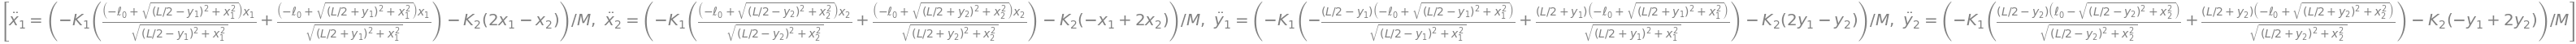

In [8]:
newton_subs2=[]
for i in range(4):
    newton_subs2.append(newton_subs1[i].subs([(la,pitagoras[0].rhs),
                                              (lb,pitagoras[1].rhs),
                                              (lc,pitagoras[2].rhs),
                                              (ld,pitagoras[3].rhs),
                                              (le,pitagoras[4].rhs),
                                              (lf,pitagoras[5].rhs),
                                              (lg,pitagoras[6].rhs)
                                             ] )
                       )

newton_subs2

In [9]:
def taylor_orden1(f):
    return (f.subs([(x1,0),(x2,0),(y1,0),(y2,0)])
           +sp.diff(f,x1).subs([(x1,0),(x2,0),(y1,0),(y2,0)])*x1
           +sp.diff(f,x2).subs([(x1,0),(x2,0),(y1,0),(y2,0)])*x2
           +sp.diff(f,y1).subs([(x1,0),(x2,0),(y1,0),(y2,0)])*y1
           +sp.diff(f,y2).subs([(x1,0),(x2,0),(y1,0),(y2,0)])*y2
           )

newton_lin= []
for i in range(4):
    newton_lin.append(sp.Eq(newton_subs2[i].lhs, taylor_orden1(newton_subs2[i].rhs) ) )

newton_lin

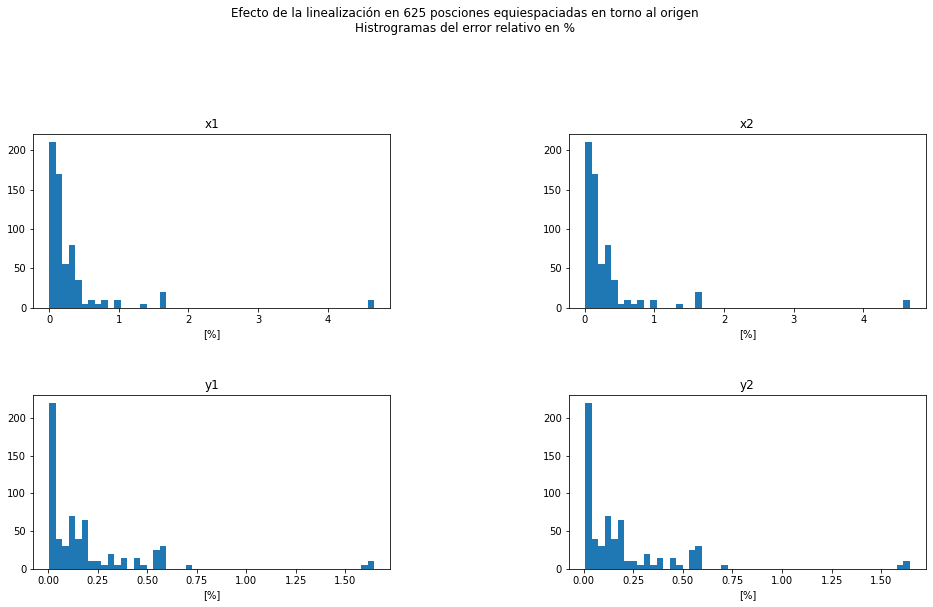

In [10]:
import numpy as np
import matplotlib.pyplot as plt

X1 = np.arange(-0.5, 0.5, 0.2)
X2 = np.arange(-0.5, 0.5, 0.2)
Y1 = np.arange(-0.5, 0.5, 0.2)
Y2 = np.arange(-0.5, 0.5, 0.2)
X1,X2,Y1,Y2=np.meshgrid(X1,X2,Y1,Y2)

f1=sp.lambdify((x1,x2,y1,y2),newton_subs2[0].rhs.subs([(k1,1),(k2,1),(m,1),(L,9),(l0,3)]),"numpy")
f2=sp.lambdify((x1,x2,y1,y2),newton_subs2[1].rhs.subs([(k1,1),(k2,1),(m,1),(L,9),(l0,3)]),"numpy")
g1=sp.lambdify((x1,x2,y1,y2),newton_subs2[2].rhs.subs([(k1,1),(k2,1),(m,1),(L,9),(l0,3)]),"numpy")
g2=sp.lambdify((x1,x2,y1,y2),newton_subs2[3].rhs.subs([(k1,1),(k2,1),(m,1),(L,9),(l0,3)]),"numpy")

f1l=sp.lambdify((x1,x2,y1,y2),newton_lin[0].rhs.subs([(k1,1),(k2,1),(m,1),(L,9),(l0,3)]),"numpy")
f2l=sp.lambdify((x1,x2,y1,y2),newton_lin[1].rhs.subs([(k1,1),(k2,1),(m,1),(L,9),(l0,3)]),"numpy")
g1l=sp.lambdify((x1,x2,y1,y2),newton_lin[2].rhs.subs([(k1,1),(k2,1),(m,1),(L,9),(l0,3)]),"numpy")
g2l=sp.lambdify((x1,x2,y1,y2),newton_lin[3].rhs.subs([(k1,1),(k2,1),(m,1),(L,9),(l0,3)]),"numpy")

f1_eval=f1(X1,X2,Y1,Y2)
f2_eval=f2(X1,X2,Y1,Y2)
g1_eval=g1(X1,X2,Y1,Y2)
g2_eval=g1(X1,X2,Y1,Y2)

f1l_eval=f1l(X1,X2,Y1,Y2)
f2l_eval=f2l(X1,X2,Y1,Y2)
g1l_eval=g1l(X1,X2,Y1,Y2)
g2l_eval=g1l(X1,X2,Y1,Y2)

f1_err=100*np.abs((f1_eval-f1l_eval)/f1_eval)
f2_err=100*np.abs((f2_eval-f2l_eval)/f2_eval)
g1_err=100*np.abs((g1_eval-g1l_eval)/g1_eval)
g2_err=100*np.abs((g2_eval-g2l_eval)/g2_eval)

data1=np.reshape(f1_err,np.size(f1_err))
data2=np.reshape(f2_err,np.size(f2_err))
data3=np.reshape(g1_err,np.size(g1_err))
data4=np.reshape(g2_err,np.size(g2_err))

fig, axs= plt.subplots(2,2, figsize=(16,8))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
axs[0][0].hist(data1,bins=50)
axs[0][1].hist(data2,bins=50)
axs[1][0].hist(data3,bins=50)
axs[1][1].hist(data4,bins=50)
fig.suptitle("Efecto de la linealización en 625 posciones equiespaciadas en torno al origen\nHistrogramas del error relativo en %",y=1.1)
axs[0][0].set_title("x1")
axs[0][0].set_xlabel("[%]")
axs[0][1].set_title("x2")
axs[0][1].set_xlabel("[%]")
axs[1][0].set_title("y1")
axs[1][0].set_xlabel("[%]")
axs[1][1].set_title("y2")
axs[1][1].set_xlabel("[%]")
plt.show()